# Regression Exercise
Using Regression to predict wine quality.

## Import Our Libraries

In [3]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sb

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib as plt

# IMPORT OUR LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR MODEL
from sklearn.ensemble import RandomForestRegressor


# IM LEAVING THERES HERE BECAUSE IM NICE
# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# HELPER FUNCTION WITH Z-SCORES TO REMOVE OUTLIERS
import scipy.stats as stat

%matplotlib inline

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/winequality-white.csv`

In [4]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/winequality-white.csv')

# DISPLAY THE FIRST 5 ROWS
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide    pH  sulphates  alcohol  \
0                 45.0                 170.0  3.00       0.45      8.8   
1                 14.0                 132.0  3.30       0.49      9.5   
2                 30.0                  97.0  3.26       0.44     10.1   
3                 47.0                 186.0  3.19       0.40      9.9   
4                 47.0                 186.0  3.19       0.40      9.9   

   quality  
0        6  
1        6  
2        6  
3        6  
4        6

# Inspect our data using `df.describe()` function.

In [4]:
# Inspect our data using `df.describe()` function.
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4893.000000       4893.000000  4893.000000     4893.000000   
mean        6.854210          0.278221     0.334139        6.393736   
std         0.843637          0.100831     0.121048        5.072990   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide           pH  \
count  4893.000000          4893.000000           4893.000000  4893.000000   
mean      0.045791            35.310035            138.383507     3.188144   
std       0.021850            17.011384             42.509982     0.151011   
min       0.009000             2.000000              9.000000     2.720000   
25%       0.036000            23.000000            108.000000     3.090000   
50%       0.043000            34.000000            134.000000     3.180000   
75%       0.050000            46.000000            167.000000     3.280000   
max       0.346000           289.000000            440.000000     3.820000   

         sulphates      alcohol      quality  
count  4893.000000  4893.000000  4893.000000  
mean      0.489871    10.512565     5.874719  
std       0.114151     1.229755     0.880446  
min       0.220000     8.000000     3.000000  
25%       0.410000     9.500000     5.000000  
50%       0.470000    10.400000     6.000000  
75%       0.550000    11.400000     6.000000  
max       1.080000    14.200000     8.000000

# Check for Nulls.

In [6]:
# Check for Nulls.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Check for Duplicates

In [9]:
# Check for Duplicates
df.duplicated().sum()


937

In [10]:
# Remove duplicates
print(df.shape)
df = df.drop_duplicates()


# Sanity check
print(df.shape)

(4893, 11)
(3956, 11)


# Visualize our data to discover outliers.
* Use `sns.pairplot`

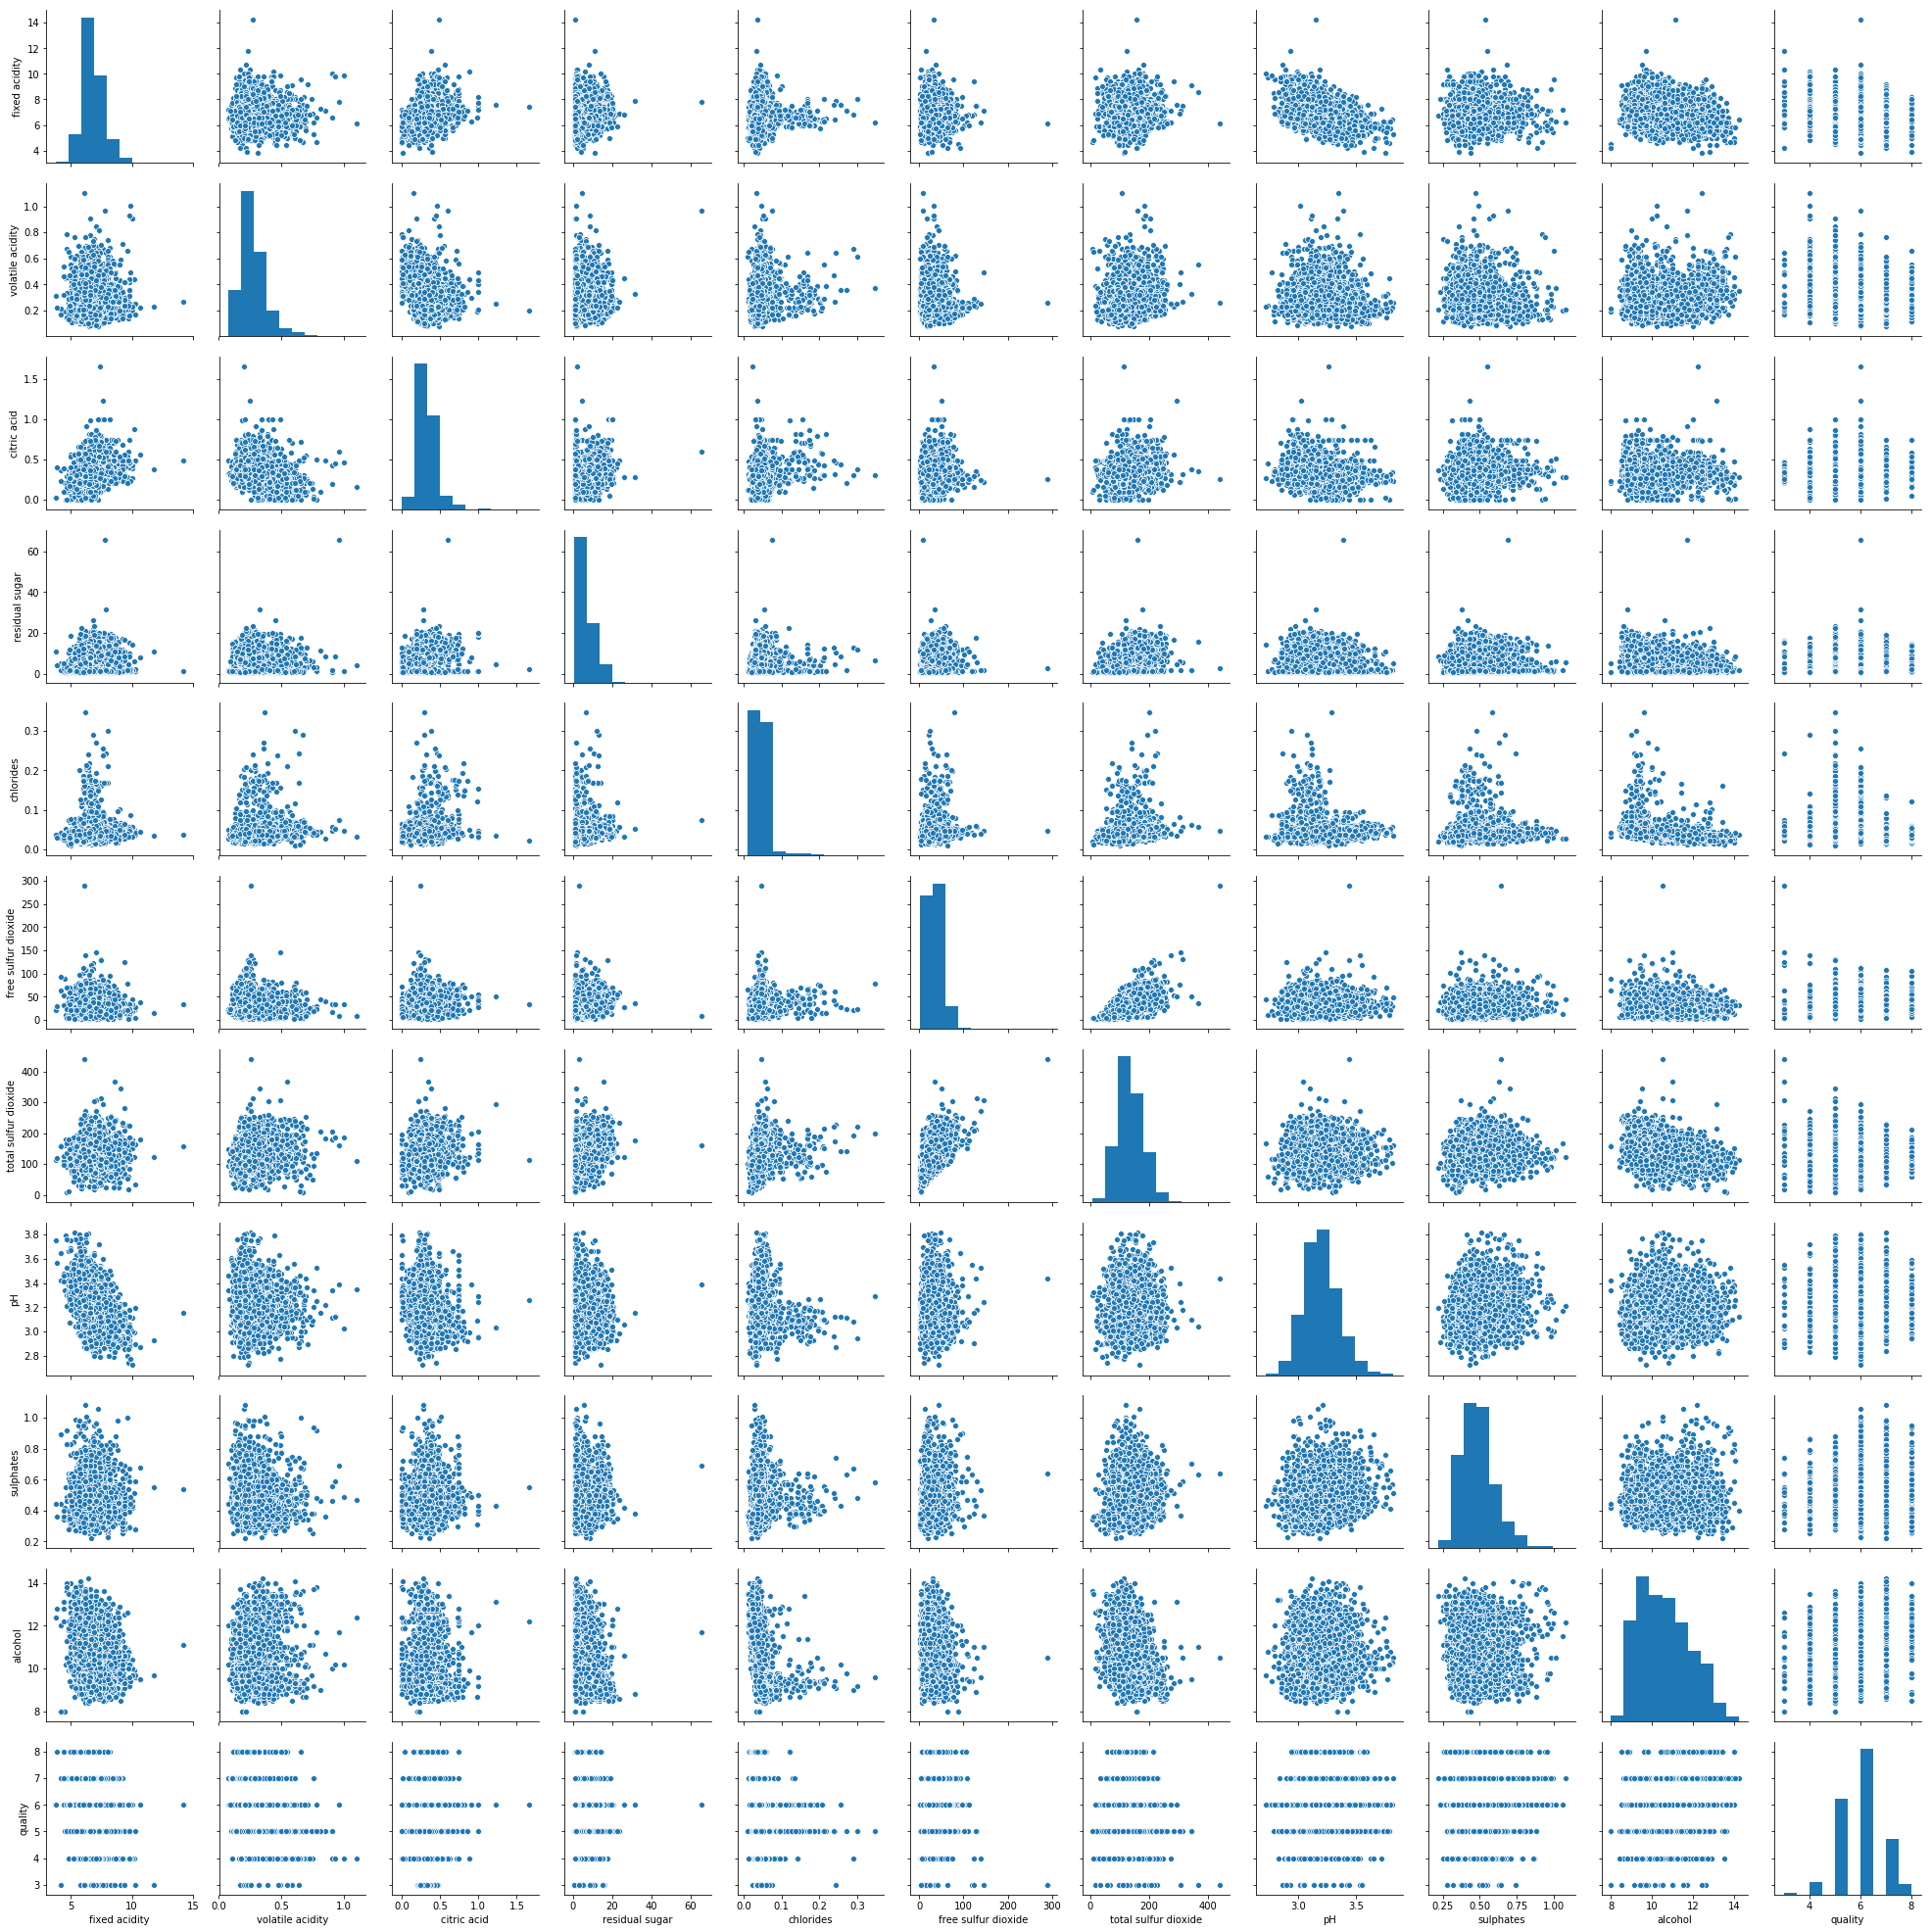

In [15]:
# Visualize our data to discover outliers.
sb.pairplot(data=df)

___
# STEP 2  (s):  Select and Engineer Features

# Remove outliers
* Make sure you DO NOT remove outliers from our target variable of `quality`.

In [5]:
# Keep this for later
original_cols = df.columns

# Set the columns you want to remove outliers for
target_cols = ['fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'pH',
    'sulphates',
    'alcohol']

# Make a new list that is going to contain our z-score
z_score_cols = []

# Loop through our target columns
for col in target_cols:
    # Make the new column name the same as the original but with 'z_score' added to it
    new_col_name = col + ' z_score'
    
    # Set the new column equal to the score
    df[new_col_name] = stat.stats.zscore(df[col])
    
    # Set the z-score to its absolute value of the for easier filtering
    df[new_col_name] = abs(df[new_col_name])
    
    # Append the new column name our z_score_cols list for easier access for later.
    z_score_cols.append(new_col_name)


condition = df[z_score_cols] < 3

# Say TRUE only if all of the rows are True, else return False
condition = condition.all(axis=1)

print('Before removal of outliers', df.shape)

# Apply our condition to our dataframe and replace our current dataframe with the applied condition.
df = df[condition]

print('After removal of outliers', df.shape)

Before removal of outliers (4893, 21)
After removal of outliers (4497, 21)


In [8]:
# can't run ^ twice then run to see the plots or it will show twice the plots.
original_cols

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

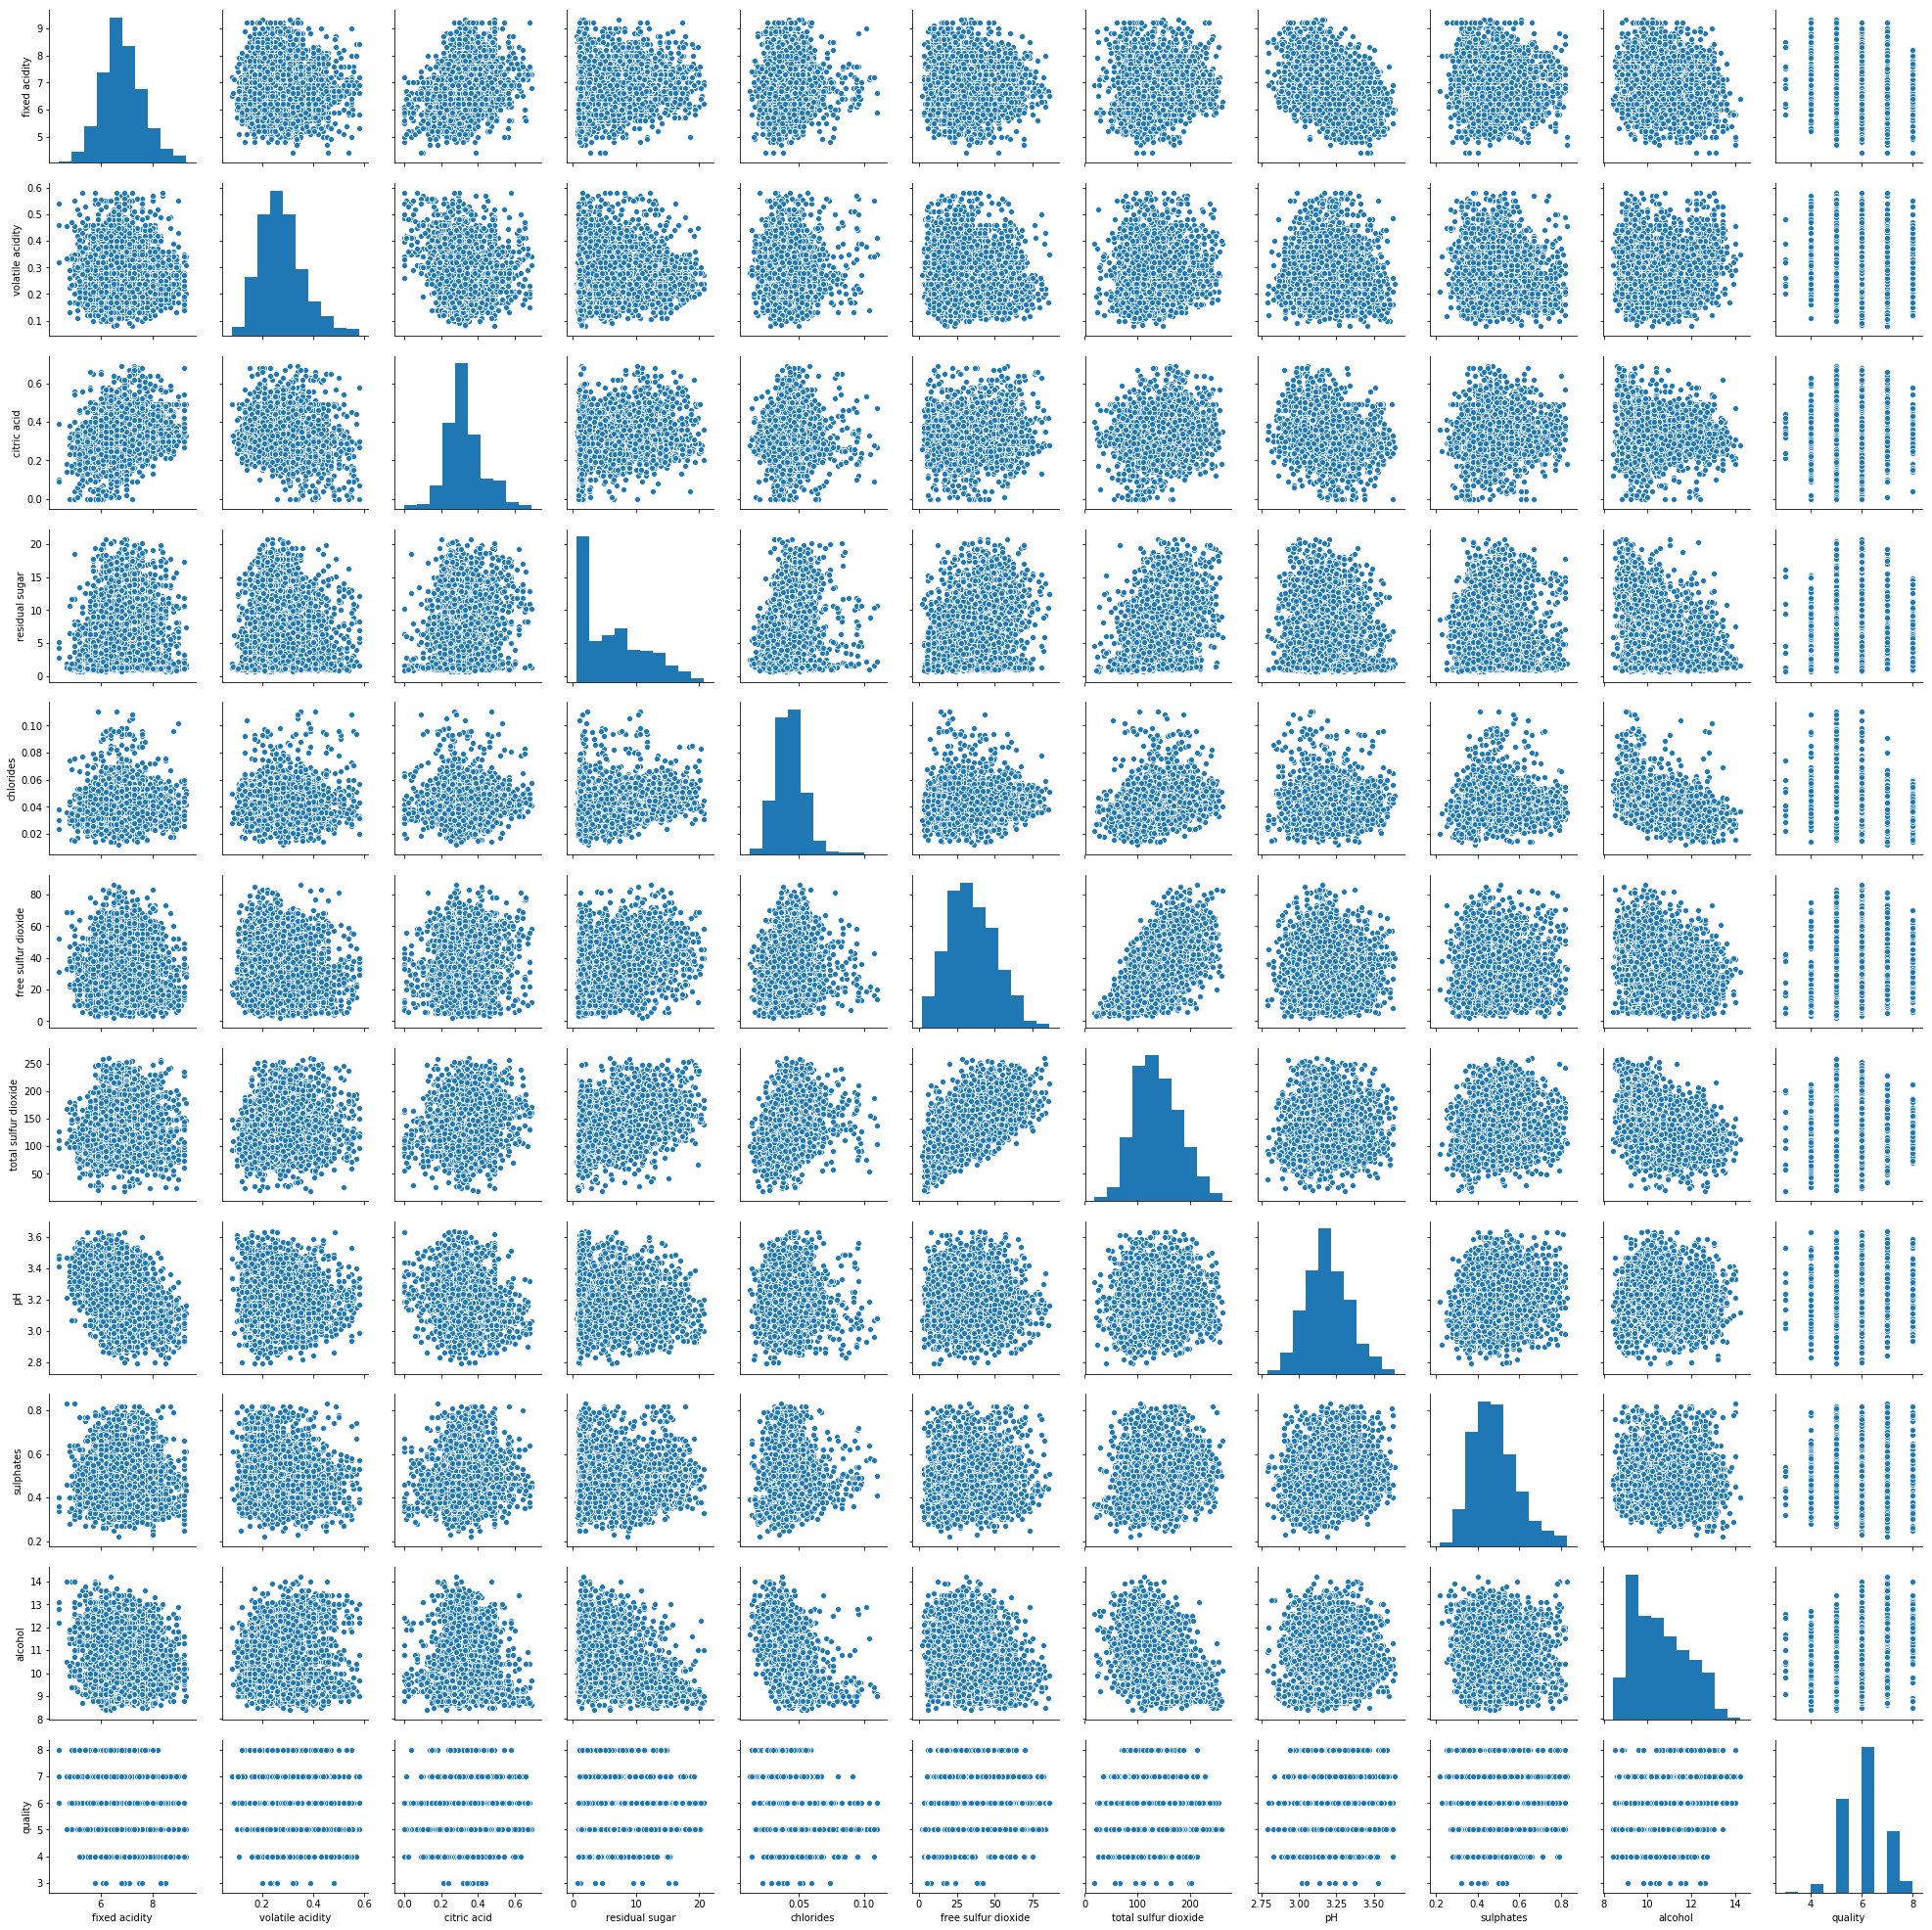

In [7]:
# Keep only original columns
df = df[original_cols]

# Visualize using sns.pairplot again to see if outliers were removed. 
# sb.pairplot(data=df) -> <seaborn.axisgrid.PairGrid at 0x7ffde91567f0>
sb.pairplot(df)

# Find which features have a linear relationship with quality.
* Plot below the linear relationship between each variable against quality.
* Use `sns.relplot`

/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


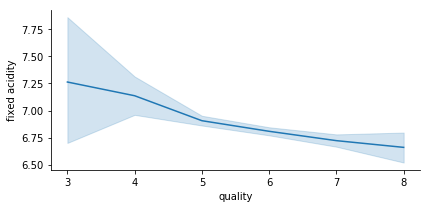

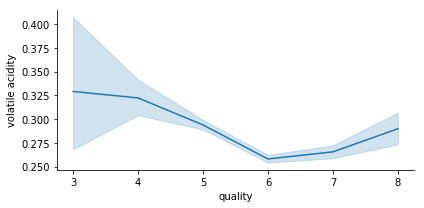

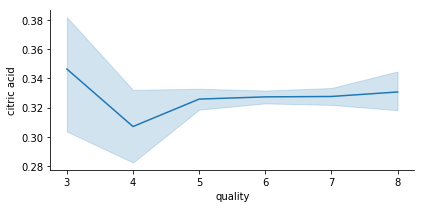

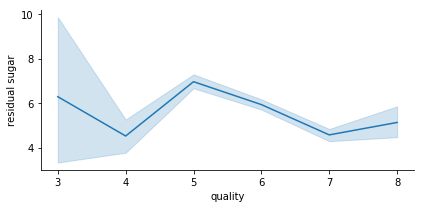

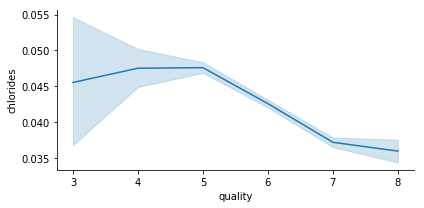

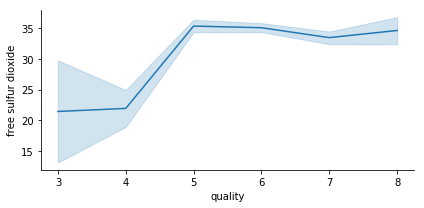

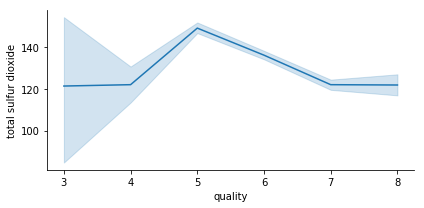

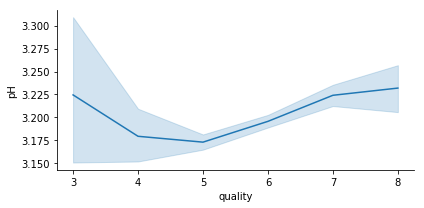

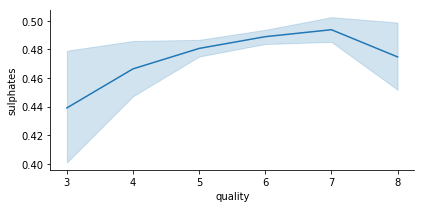

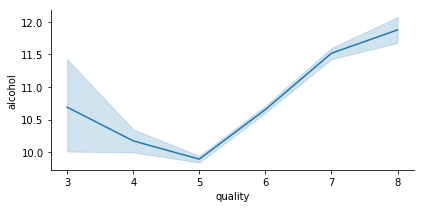

In [35]:
# Plot below the linear relationship between each variable against quality

all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

# YOURE GOING TO NEED TO USE A LOOP
for feature in all_features:
    sb.relplot(data=df, y=feature, x='quality', kind='line', height=3, aspect=2)

# Select your predictor features and your target variable.
1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
2. Define your `X` and `y` variables
3. Split our data into a training set and a testing set.

In [38]:
# 1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
selected_features = ['fixed acidity', 'volatile acidity', 
               'chlorides', 'pH', 'sulphates', 'alcohol']

In [43]:
# Define your X and y variables
# ISOLATE THE DATA TO JUST OUR FEATURES
X = df[selected_features].values

# ISOLATE JUST OUR TARGET DATA, THIS IS WHAT WE ARE TRYING TO PREDICT. IS OUR DEPENDENT VARIABLE
y = df['quality'].values

print('X = ', X)
print('y = ', y)

X =  [[ 6.3    0.3    0.049  3.3    0.49   9.5  ]
 [ 8.1    0.28   0.05   3.26   0.44  10.1  ]
 [ 7.2    0.23   0.058  3.19   0.4    9.9  ]
 ...
 [ 6.5    0.24   0.041  2.99   0.46   9.4  ]
 [ 5.5    0.29   0.022  3.34   0.38  12.8  ]
 [ 6.     0.21   0.02   3.26   0.32  11.8  ]]
y =  [6 6 6 ... 6 7 6]


In [47]:
# 3. Split our data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

print(X_train, "X_train \n", X_test, "X_test \n", y_train, "y_train \n", y_test)

[[ 6.8    0.28   0.042  3.19   0.56  12.4  ]
 [ 6.2    0.23   0.039  3.23   0.43   8.8  ]
 [ 7.7    0.275  0.039  3.01   0.56  10.7  ]
 ...
 [ 5.8    0.17   0.037  3.29   0.38  11.3  ]
 [ 7.3    0.41   0.057  3.2    0.41   9.9  ]
 [ 6.7    0.13   0.046  3.33   0.33  10.1  ]] X_train 
 [[ 5.7    0.26   0.02   3.39   0.37  10.6  ]
 [ 8.1    0.46   0.052  3.03   0.42  11.2  ]
 [ 8.5    0.22   0.04   3.04   0.37  10.5  ]
 ...
 [ 7.     0.53   0.029  3.08   0.5   12.5  ]
 [ 8.2    0.35   0.039  3.15   0.34  11.9  ]
 [ 5.4    0.18   0.041  3.42   0.4    9.4  ]] X_test 
 [6 6 5 ... 6 6 7] y_train 
 [5 5 4 7 5 6 4 4 5 5 5 6 6 7 5 6 4 5 6 6 5 5 6 6 6 6 6 8 6 6 5 5 6 6 7 6 5
 7 5 6 4 4 6 5 7 6 6 6 6 5 6 6 6 6 7 6 4 7 6 5 6 8 7 6 7 7 8 8 5 6 6 6 6 5
 7 4 7 5 5 7 5 5 5 6 8 6 5 6 6 7 7 6 6 5 7 5 7 6 5 7 6 6 5 7 6 7 5 6 6 6 5
 4 6 5 7 6 6 6 6 7 6 7 7 6 7 5 4 6 6 6 6 6 6 7 6 6 7 7 5 6 5 5 6 7 6 7 6 5
 5 6 5 5 5 5 6 5 5 6 7 7 5 4 8 6 5 5 6 5 6 6 8 6 7 5 7 5 6 6 5 5 5 5 5 7 5
 5 6 7 6 5 5 6 5 6 6 6 6 5

___
# STEP 3 (b): Build and train our model
1. Initialize our Linear Regression model.
2. Use our training data to fit aka train our model.


In [48]:
# 1. Initialize our Linear Regression model.
model = LinearRegression()


In [50]:
# 2. Use our training data to fit aka train our model.
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

___
# STEP 4 (e): Evaluate model.
1. Make new predicitions using our testing data.
2. Calculate R-Squared and Mean Absolute Error socres

In [51]:
# 1. Make new predicitions using our testing data.
y_pred = model.predict(X_test)

# Now lets see how well the model explains the data by finding the R-Squared.
* You can think of r-squared as a goodness of fit measure for the model. 
* How well the trendline explains the variance of the data. 
* R-squared measure the strength of the relationship between your model and the dependent variable on a 0-100% scale.
* Remember for human labeled data like the quality of wine, .3 is pretty good.

In [52]:
# 2. Calculate R-Squared and Mean Absolute Error socres

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-Squared Score: 0.296048732344082
Mean Absolute Error: 0.575026861690719


# Saving and exporting our model for future use.
* Use the library pickle to export the pickle

In [53]:
import pickle

# NAME YOUR MODEL 
filename = 'white-wine-model.pkl'

# EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
pickle.dump(model, open(filename, 'wb'))

___
# Random Forest Regression

Without step by step guidance, in the cell below, build a Random Forest Regression model and compare the r-squared and mean absolute error scores to the Linear Regression model.
* Dont forget, Random Forest can handle non-linear features!

* When splitting your data, make sure to use the same random state as you did for your Linear Regression model
    * `train_test_split(???, random_state=1)`

* Dont forget about `GridSearchCV` from our last lecture :) 

1. Which model proved to have better scores.
2. Why do you think that is...?


In [68]:
#nonlinear features
all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']
X = df[all_features].values
# y = df['quality'].values

# Split our data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model)

# Calculate R-Squared and Mean Absolute Error scores
# r_squared  -0.5149655345573096, mae  0.552617079889807
# r_squared = metrics.r2_score(y_pred, y_test)
# mae = metrics.mean_absolute_error(y_pred, y_test)

r_squared = metrics.r2_score(y_test,y_pred)
mae = metrics.mean_absolute_error(y_test,y_pred)

print('r_squared ', r_squared, '\nmae ', mae)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)
r_squared  0.34792078967143236 
mae  0.552617079889807


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

params = {
    'max_depth': [2, 5, 7, 100], 
    'min_samples_split': [2, 10, 20, 100],
    'min_samples_leaf': [1, 10, 20, 30],
}

grid_search_cv = GridSearchCV(
        estimator = DecisionTreeClassifier(),
#   change to RandomForestRegressor
        param_grid = params,
        scoring = 'f1'
    )

X = df[all_features].values
y = df['quality'].values

grid_search_cv.fit(X_train, y_train)
print(grid_search_cv.best_params_)
model = grid_search_cv.best_estimator_
print(model)

NameError: name 'all_features' is not defined

In [77]:
# 1. Which model proved to have better scores.


print('R-squared value of .3 is pretty good for human labeled data so the Random Forest Regression model is better.')

R-squared value of .3 is pretty good for human labeled data so the Random Forest Regression model is better.


In [78]:
# 2. Why do you think that is...?


print('Random Forest Regression model has a higher R-squared value.')

Random Forest Regression model has a higher R-squared value.


In [1]:
RandomForestRegressor??

Object `RandomForestRegressor` not found.
